C:\Users\5c1cz\AppData\Local\Temp\ipykernel_1280\3917187063.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(X[x], 'k-', color="red")


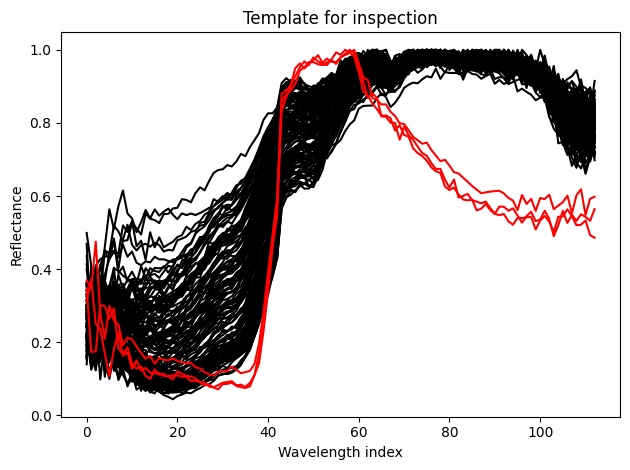

[ 37 107  28   3  77  56  54  20 113  48   0  68  94  81   4  18  73  58
  65  55 116 104  17  74 117  25  89 105   1 100  29  93  44  60  45  96
   5   6  90  99  40  75  82   7 101  84  80 110  47  42  27 118  61  12
  16  85 120  70  53  78  86  32  36  39  71  67  92  72  50  83 121  97
  23  49   9  59  15  79  43  95  33  88  11  10  24  64  69  41  66  21
  76 111   2  35  91  87  19  13 112  30 122   8  22 103 114 115  38 119
  14  31  34  26  98 108  63 109  62 102  57 106  52  51  46]


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
from sklearn.decomposition import PCA

X = np.load('blood1X.npz')['X']
pca = PCA(n_components=2)
Xpca = pca.fit_transform(X)
# with pca, the anomalies tend to be pushed fuhrther
distance = [la.norm(x) for x in Xpca.T[1]]
furthest = np.argsort(distance)[-1]

known_blood_samples = 3
arg_sorted_distances = np.argsort(distance)[::-1]
# confirmation
for x in arg_sorted_distances[known_blood_samples:]:
    plt.plot(X[x], 'k-')
    plt.xlabel('Wavelength index')
    plt.ylabel('Reflectance')
    plt.title('Template for inspection')
    plt.tight_layout()

for x in arg_sorted_distances[:known_blood_samples]:
    plt.plot(X[x], 'k-', color="red")
    plt.xlabel('Wavelength index')
    plt.ylabel('Reflectance')
    plt.title('Template for inspection')
    plt.tight_layout()
plt.show()

answer = input("save this sample (y)?")
if answer == "y":
    print(arg_sorted_distances)
    np.savetxt('blood_template.txt', np.mean(X[arg_sorted_distances[:known_blood_samples]], axis=0))
plt.show()


